# Bankruptcy Prediction via Regression


In this assignment, you use the bankruptcy data set from a paper (see the reference in the bottom of the assignment). The data set can be downloaded from HuskyCT. The following is the information of the attributes/variables, from the income statements and balance sheets:

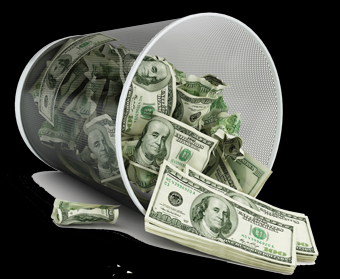


1)	Size
    
a.	Sales

2)	Profit

a.	ROCE: profit before tax=capital employed (%)

b.	FFTL: funds flow (earnings before interest, tax & depreciation)=total liabilities

3)	Gearing

a.	GEAR: (current liabilities + long-term debt)=total assets

b.	CLTA: current liabilities=total assets

4)	Liquidity

a.	CACL: current assets=current liabilities

b.	QACL: (current assets – stock)=current liabilities

c.	WCTA: (current assets – current liabilities)=total assets	

5)	LAG: number of days between account year end and the date the annual report and accounts were filed at company registry.

6)	AGE: number of years the company has been operating since incorporation date.

7)	CHAUD: coded 1 if changed auditor in previous three years, 0 otherwise

8)	BIG6: coded 1 if company auditor is a Big6 auditor, 0 otherwise

The target variable is FAIL, either = 1 or 0. You program and model using logistic regression.


## Source:

Malcolm J. Beynon, Michael J. Peel, Variable precision rough set theory and data discretisation: an application to corporate failure prediction

In [3]:
import pandas as pd
bankruptcy_df = pd.read_csv(r'C:\My Courses\MATH 5671\assignments\assignment05\bankruptcy.csv',header =0)
bankruptcy_df.head()

,Firm,SALES,ROCE,FFTL,GEAR,CLTA,CACL,QACL,WCTA,LAG,AGE,CHAUD,BIG6,FAIL
0,o1,6762,7.5364,0.1545,0.6233,0.6233,1.5489,0.7356,0.3422,96,74,0,0,0
1,o2,16149,-1.0712,0.0271,1.2218,1.2218,0.6236,0.3153,-0.4599,287,29,0,1,0
2,o3,8086,15.2024,0.6163,0.3307,0.3307,2.3553,1.7513,0.4482,64,51,0,1,0
3,o4,7646,31.2239,0.6312,0.5205,0.4829,1.6397,1.4935,0.3089,286,25,0,0,0
4,o5,36067,10.9613,0.3540,0.3786,0.3786,1.5852,1.1626,0.2216,301,33,0,1,0


## Data Exploration

Exploring the dataset using plots, histograms, descriptive statistics, etc. Some variables were explored, please do the same to other variables

In [4]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
# target variable distribution
bankruptcy_df.groupby(['FAIL'])[['FAIL']].count()

,FAIL
FAIL,
0,30
1,30


In [7]:
bankruptcy_df.head()

,Firm,SALES,ROCE,FFTL,GEAR,CLTA,CACL,QACL,WCTA,LAG,AGE,CHAUD,BIG6,FAIL
0,o1,6762,7.5364,0.1545,0.6233,0.6233,1.5489,0.7356,0.3422,96,74,0,0,0
1,o2,16149,-1.0712,0.0271,1.2218,1.2218,0.6236,0.3153,-0.4599,287,29,0,1,0
2,o3,8086,15.2024,0.6163,0.3307,0.3307,2.3553,1.7513,0.4482,64,51,0,1,0
3,o4,7646,31.2239,0.6312,0.5205,0.4829,1.6397,1.4935,0.3089,286,25,0,0,0
4,o5,36067,10.9613,0.3540,0.3786,0.3786,1.5852,1.1626,0.2216,301,33,0,1,0


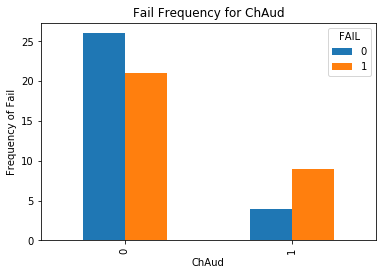

In [18]:
# cross tabulation of Age and Fail (Target variable).
pd.crosstab(bankruptcy_df.CHAUD,bankruptcy_df.FAIL).plot(kind='bar')
plt.title('Fail Frequency for ChAud')
plt.xlabel('ChAud')
plt.ylabel('Frequency of Fail')
plt.show()

We can see that companies with CHAUD = 1 is more likely to fail. CHAUD status may be used for modeling later

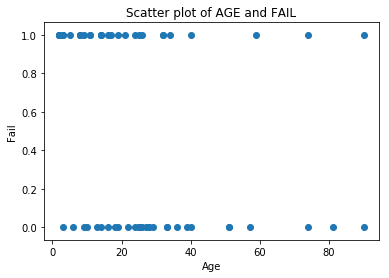

In [21]:
# Scatter plot of age and subscription
import matplotlib.pyplot as plt 
plt.scatter(bankruptcy_df.AGE,bankruptcy_df.FAIL)
plt.title('Scatter plot of AGE and FAIL')
plt.xlabel('Age')
plt.ylabel('Fail')
plt.show()

Age does'n seem a good predictor as the target variable doesn't seem depending on the age on the scatter plot

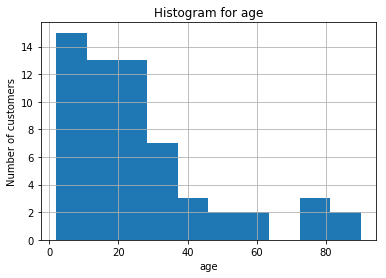

In [22]:
# Histogram of age.
import matplotlib.pyplot as plt 
bankruptcy_df.AGE.hist()
plt.title('Histogram for age')
plt.xlabel('age')
plt.ylabel('Number of customers')
plt.show()

## Preprocessing

There is no categorical variables to convert to dummy variables

In [6]:
from sklearn.cross_validation import train_test_split
X = bankruptcy_df[bankruptcy_df.columns.difference(['Firm', 'FAIL'])]
y = bankruptcy_df[['FAIL']]
y.head()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [8]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.FAIL.values.tolist())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1 1 1 1 1]


In [9]:
# Now select features for ones with support = True
X_train = X_train.iloc[:,rfe.support_ == True]
X_test = X_test.iloc[:,rfe.support_ == True]
X_train.head()

,AGE,BIG6,CACL,CHAUD,CLTA,FFTL,GEAR,LAG,QACL,ROCE,SALES,WCTA
14,25,0,1.3534,0,0.5072,0.2643,0.5736,268,0.4440,9.0815,24261,0.1792
32,90,0,0.7485,0,1.0139,-0.0363,1.0139,301,0.5265,-16.6670,8604,-0.2550
50,8,0,0.7646,0,0.5726,-0.0231,0.9967,301,0.4307,-10.0100,4718,-0.1348
29,40,1,0.7976,0,0.7883,-0.0260,0.7883,147,0.5631,-8.3372,37415,-0.1596
42,8,1,0.7437,0,0.8516,0.0735,1.0072,86,0.4385,-2.5559,47237,-0.2183


In [1]:
from sklearn.linear_model import LogisticRegression
# write your code here (question 1)






In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix = confusion_matrix(y_test.FAIL.values.tolist(), y_test_pred)
print(confusion_matrix)
print(classification_report(y_test.FAIL.values.tolist(), y_test_pred))

[[6 2]
 [1 9]]
             precision    recall  f1-score   support

          0       0.86      0.75      0.80         8
          1       0.82      0.90      0.86        10

avg / total       0.84      0.83      0.83        18



Starting here write your own logistic regression code to classify companies using test data, compute the accuracy, confusion matrix, precision, recall. Start with writing individual functions, then the main code that calls the functions above to train a model using the training data and return theta, then test the model using the test data, compute accuracy, confusion matrix, precision, recall

In [67]:
def computeCost(X, y, theta = None, lambdad = 0.1):
    # write your code here
        
    return cost

In [68]:
def optimizeCost(X, y, theta, step, lambdad, maxrun):
    # write your code here
    
    # return multiple variables in a tuple
    return theta,costs

In [79]:
def sigmoid(z):
    # write your code here
    
    return g

In [ ]:
def mapping(X, degree):
    # write your code here
    
    return Xmap